In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [6]:
# Set the style for the plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

In [8]:
# Load datasets
print("Loading and examining the datasets...")
zoo_df = pd.read_csv('zoo.csv')
class_df = pd.read_csv('class.csv')


Loading and examining the datasets...


In [10]:
# Display basic information about the datasets
print("\nZoo Dataset Preview:")
print(zoo_df.head())
print("\nZoo Dataset Info:")
print(zoo_df.info())
print("\nZoo Dataset Summary Statistics:")
print(zoo_df.describe())

print("\nClass Dataset Preview:")
print(class_df.head())



Zoo Dataset Preview:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1 

In [12]:
# Join datasets to get class names
merged_df = pd.merge(zoo_df, class_df, left_on='class_type', right_on='Class_Number')
print("\nMerged Dataset Preview (with class names):")
print(merged_df.head())


Merged Dataset Preview (with class names):
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  ...  fins  legs  tail  domestic  catsize  class_type  \
0        1         1  ...     0     4     0         0        1           1   
1        1         1  ...     0     4     1         0        1           1   
2        1         1  ...     1     0     1         0        0           4   
3        1         1  ...     0     4     0         0        1           1   
4        1         1  ...     0     4     1         0        1           1   

   Class_Number  Number_Of_Animal_Species_

In [14]:
# ===============================
# DATA EXPLORATION AND VISUALIZATION
# ===============================


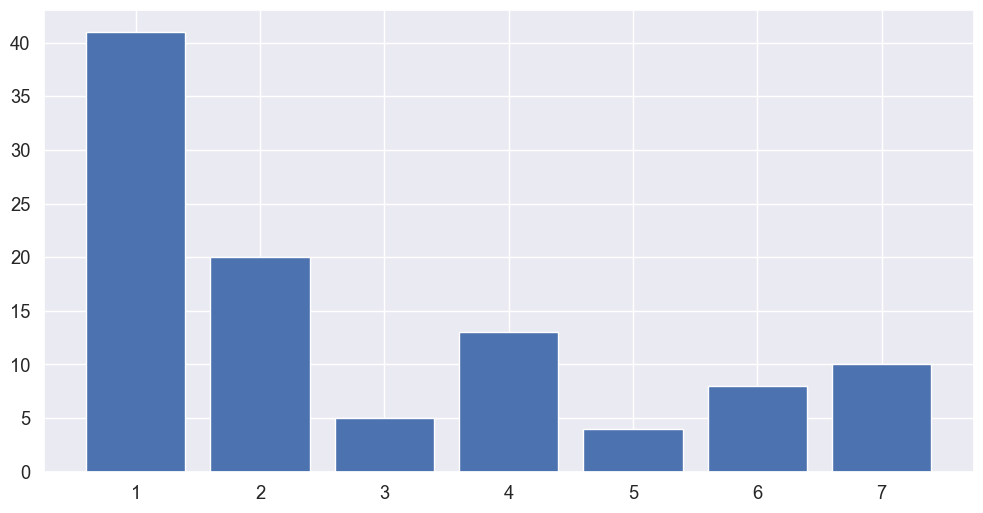

In [16]:
# Figure 1: Class distribution
plt.figure(figsize=(12, 6))
class_counts = zoo_df['class_type'].value_counts().sort_index()
bars = plt.bar(class_counts.index, class_counts.values)

In [18]:
# Get class names from class_df for better labels
class_names = class_df.set_index('Class_Number')['Class_Type'].to_dict()

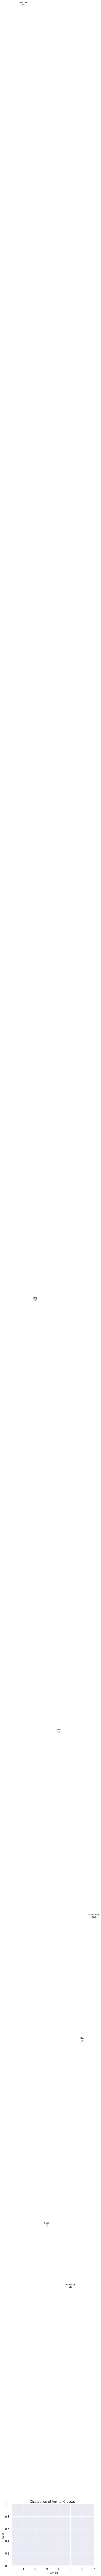

In [20]:
# Add class names and counts as labels
for i, bar in enumerate(bars):
    class_id = class_counts.index[i]
    count = class_counts.values[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f"{class_names[class_id]}\n({count})", 
             ha='center', va='bottom', rotation=0, fontsize=9)

plt.title('Distribution of Animal Classes', fontsize=15)
plt.xlabel('Class ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(class_counts.index)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Figure 2: Correlation heatmap of features
plt.figure(figsize=(14, 12))

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

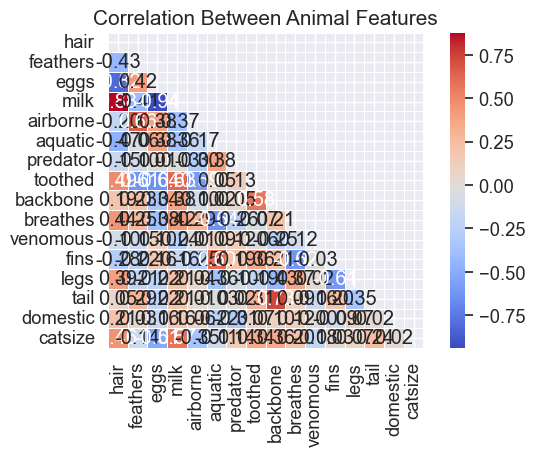

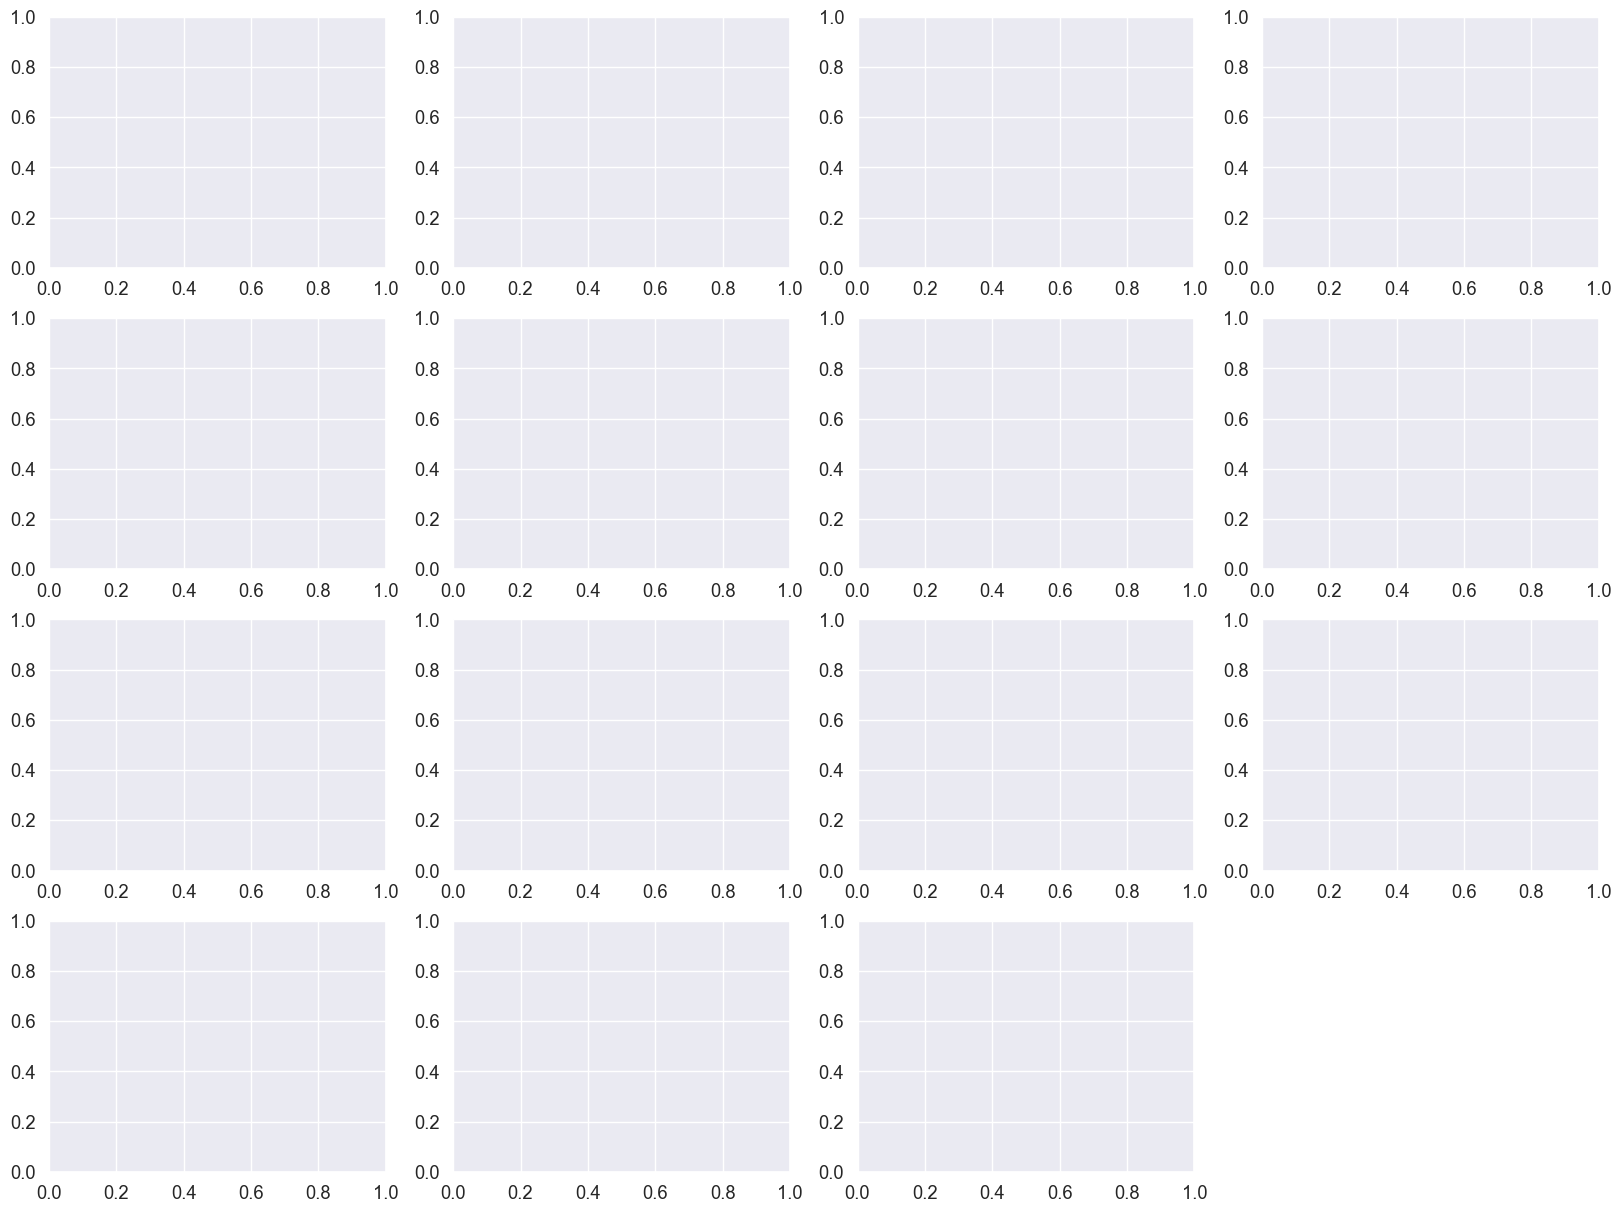

In [30]:
# Select only the feature columns (exclude animal_name and class_type)
features = zoo_df.drop(['animal_name', 'class_type'], axis=1)
correlation = features.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=0.5)
plt.title('Correlation Between Animal Features', fontsize=15)
plt.tight_layout()
plt.savefig('feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
# Figure 3: Boolean feature distribution by class
boolean_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 
                    'aquatic', 'predator', 'toothed', 'backbone', 
                    'breathes', 'venomous', 'fins', 'tail', 
                    'domestic', 'catsize']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(boolean_features):
    plt.subplot(4, 4, i+1)

In [32]:
 # Create a crosstab of the feature vs class
ct = pd.crosstab(merged_df['Class_Type'], merged_df[feature])

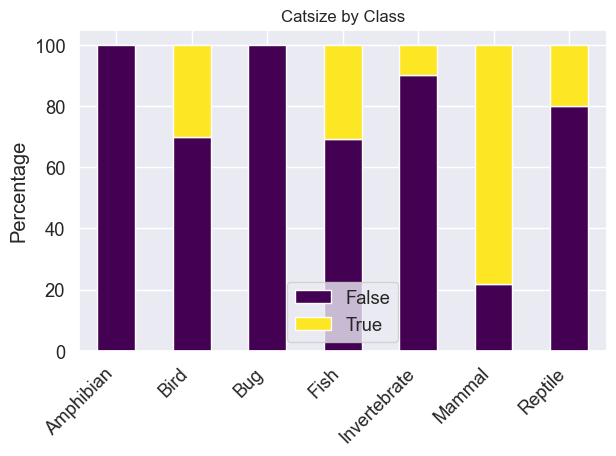

In [38]:
 # Plot stacked bars
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent.plot(kind='bar', stacked=True, ax=plt.gca(), 
                   colormap='viridis')
    
plt.title(f'{feature.capitalize()} by Class', fontsize=12)
plt.xlabel('')
plt.ylabel('Percentage')
plt.legend(['False', 'True'], loc='best')
plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.savefig('features_by_class.png', dpi=300, bbox_inches='tight')
plt.show()


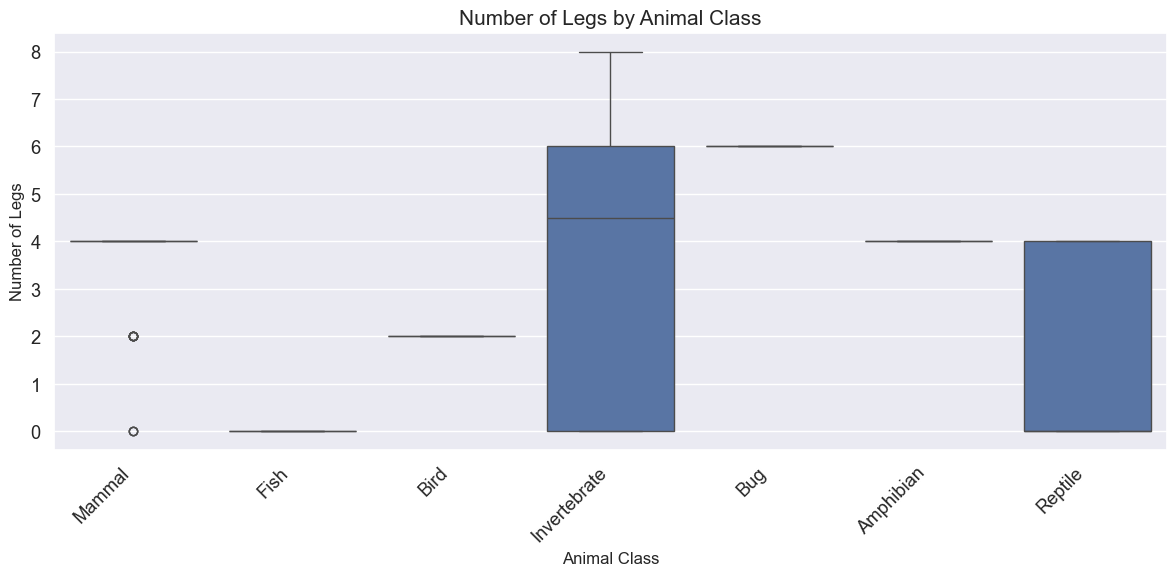

In [40]:
# Figure 4: Legs distribution by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class_Type', y='legs', data=merged_df)
plt.title('Number of Legs by Animal Class', fontsize=15)
plt.xlabel('Animal Class', fontsize=12)
plt.ylabel('Number of Legs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('legs_by_class.png', dpi=300, bbox_inches='tight')
plt.show()


In [42]:
# Figure 5: PCA visualization for dimensionality reduction
plt.figure(figsize=(12, 10))


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [44]:
# Prepare data for PCA
X = zoo_df.drop(['animal_name', 'class_type'], axis=1)
y = zoo_df['class_type']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'class': y
})


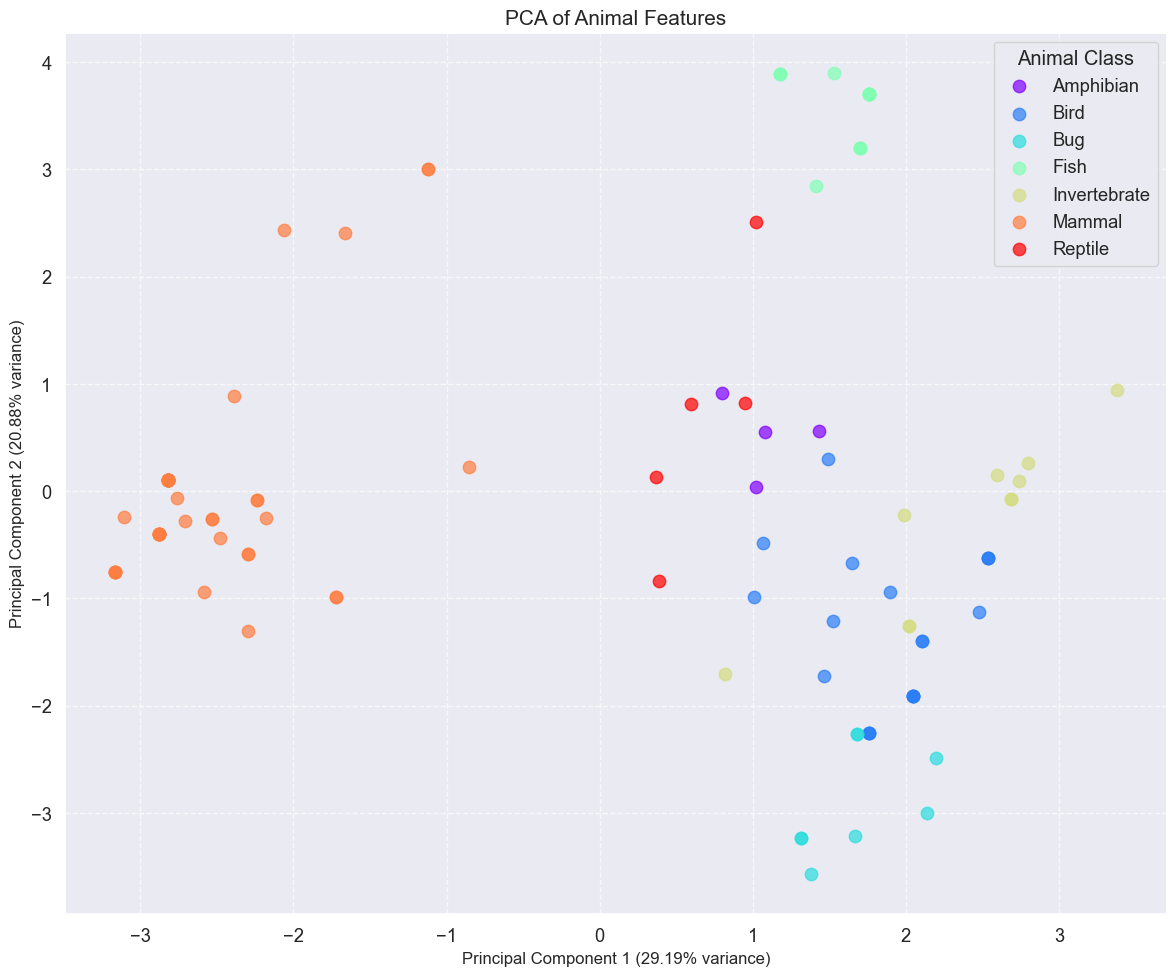

In [46]:
# Create a merged dataframe with class names
pca_merged = pd.merge(pca_df, class_df, left_on='class', right_on='Class_Number')

# Plot PCA results with class names
plt.figure(figsize=(12, 10))
colors = cm.rainbow(np.linspace(0, 1, len(pca_merged['Class_Type'].unique())))
for i, (class_type, group) in enumerate(pca_merged.groupby('Class_Type')):
    plt.scatter(group['PC1'], group['PC2'], label=class_type, color=colors[i], s=80, alpha=0.7)

plt.title('PCA of Animal Features', fontsize=15)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Animal Class")
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [48]:
# ===============================
# MACHINE LEARNING MODELS
# ===============================


In [50]:
# Prepare features and target
X = zoo_df.drop(['animal_name', 'class_type'], axis=1)
y = zoo_df['class_type']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42, probability=True)
}


In [52]:
# Train and evaluate models
results = {}
print("\nModel Evaluation:")
print("-" * 50)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print results
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    


Model Evaluation:
--------------------------------------------------

Decision Tree Classifier:
Accuracy: 0.9231

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.75      0.86         4
           7       0.67      1.00      0.80         2

    accuracy                           0.92        26
   macro avg       0.76      0.82      0.78        26
weighted avg       0.91      0.92      0.91        26


Random Forest Classifier:
Accuracy: 0.9615

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00 

C:\Users\rossd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rossd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rossd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rossd\anaconda3\Lib\site-packag

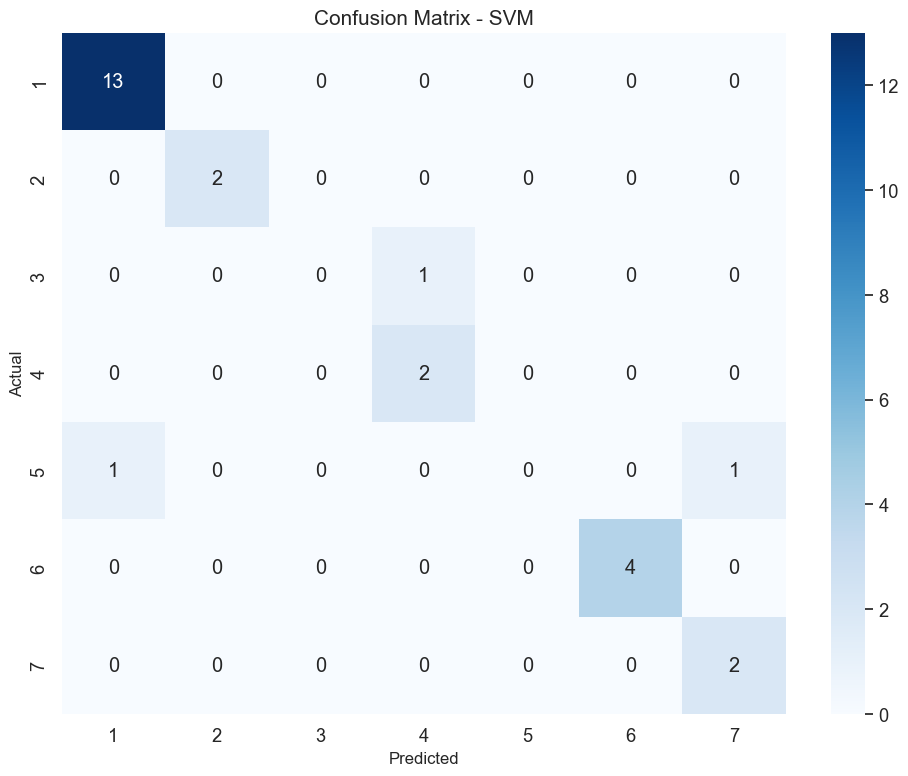

In [56]:
# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title(f'Confusion Matrix - {name}', fontsize=15)
plt.tight_layout()
plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'SVM')])

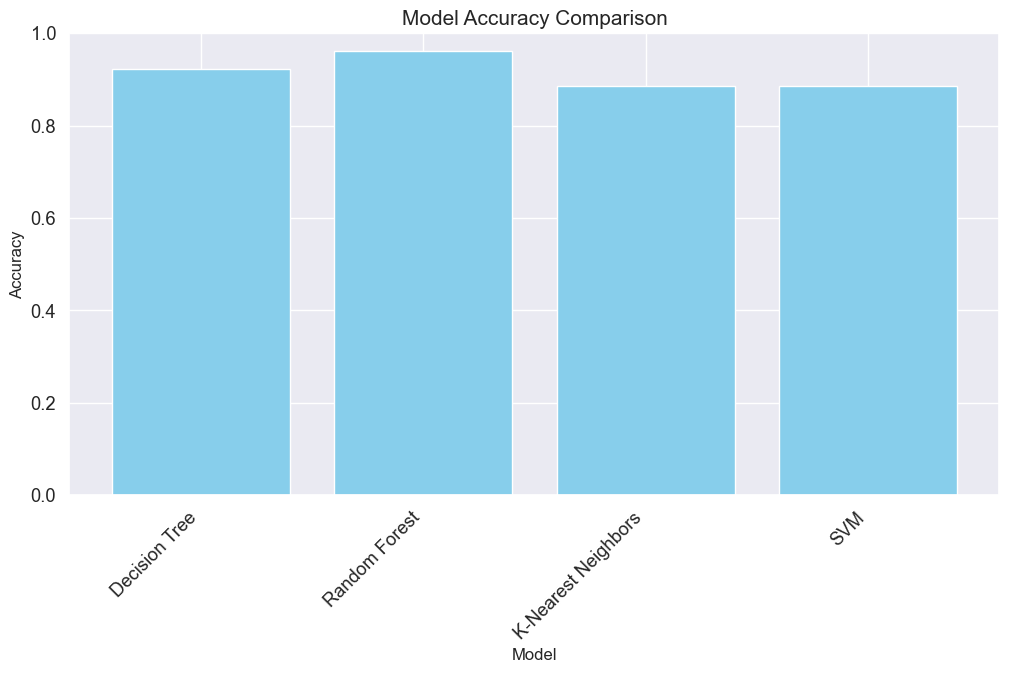

In [58]:
# Figure 6: Model Comparison
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')

C:\Users\rossd\AppData\Local\Temp\ipykernel_5792\2076844426.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


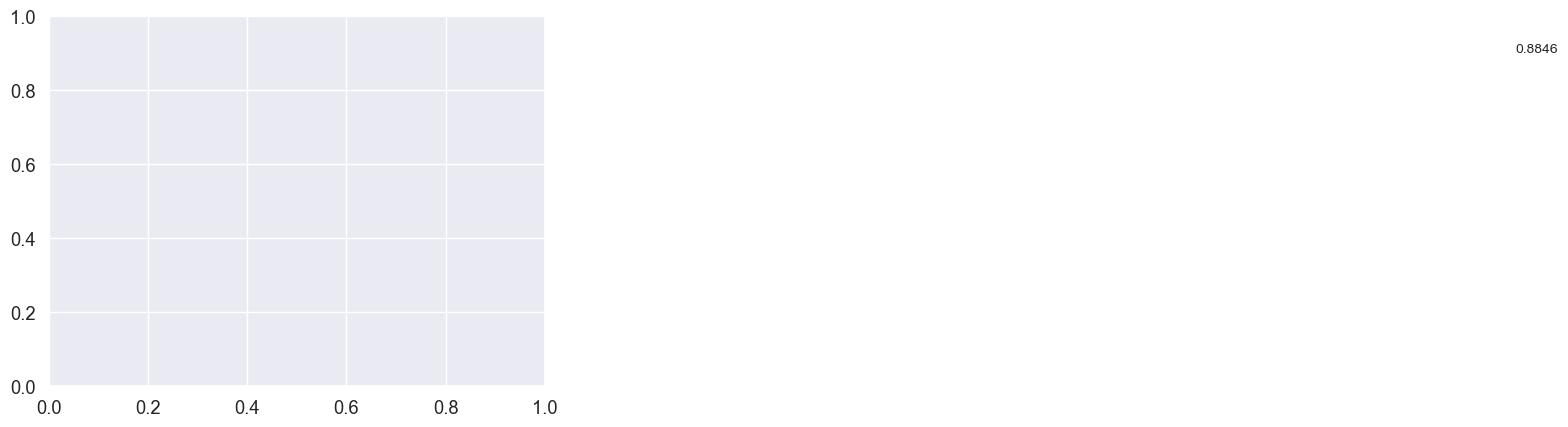

In [64]:
# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [66]:
# ===============================
# FEATURE IMPORTANCE ANALYSIS
# ===============================


C:\Users\rossd\AppData\Local\Temp\ipykernel_5792\3478336347.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


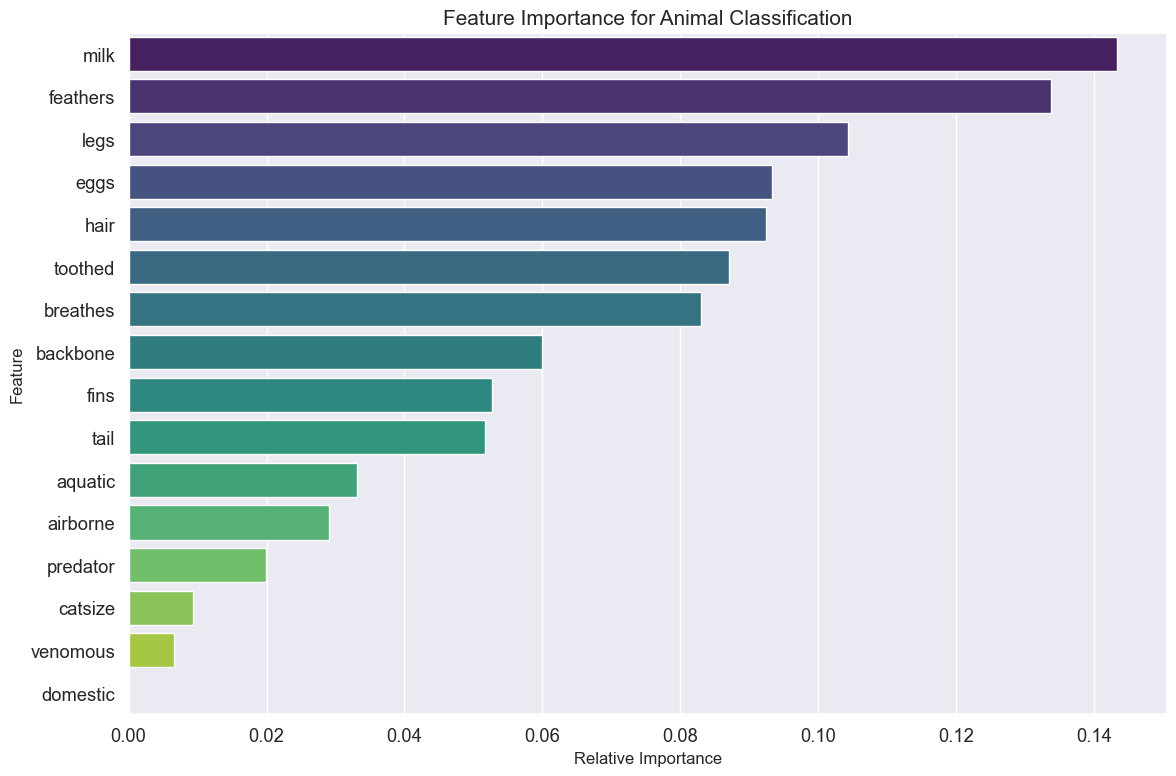

In [68]:
# Analyze feature importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Figure 7: Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Animal Classification', fontsize=15)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [70]:
# ===============================
# MODEL OPTIMIZATION (Optional - can be computationally intensive)
# ===============================


In [72]:
# Define the parameter grid for RandomForest (the best performing model)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Comment out this section if you want to skip the grid search
# print("\nPerforming Grid Search for Random Forest optimization...")
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
#                           param_grid=param_grid,
#                           cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X, y)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

In [74]:
# ===============================
# ADDITIONAL ANALYSIS: ANIMAL SIMILARITY
# ===============================

In [76]:
# Calculate similarity between animals based on their features
from sklearn.metrics.pairwise import cosine_similarity


In [78]:
# Standardize the data
X_all = zoo_df.drop(['animal_name', 'class_type'], axis=1)
X_all_scaled = StandardScaler().fit_transform(X_all)


In [80]:
# Calculate cosine similarity
similarity_matrix = cosine_similarity(X_all_scaled)

In [82]:
# Function to find most similar animals
def find_similar_animals(animal_name, top_n=5):
    if animal_name not in zoo_df['animal_name'].values:
        print(f"Animal '{animal_name}' not found in the dataset.")
        return
    
    # Get the index of the animal
    idx = zoo_df[zoo_df['animal_name'] == animal_name].index[0]
    
    # Get similarity scores
    similarity_scores = similarity_matrix[idx]
    
    # Get the indices of the most similar animals (excluding itself)
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    
    # Get the animal names and their classes
    similar_animals = zoo_df.iloc[similar_indices][['animal_name', 'class_type']]
    
    # Merge with class names
    similar_with_class = pd.merge(similar_animals, 
                                 class_df, 
                                 left_on='class_type', 
                                 right_on='Class_Number')
    
    # Add similarity score
    similar_with_class['similarity'] = similarity_scores[similar_indices]
    
    return similar_with_class[['animal_name', 'Class_Type', 'similarity']]

# Example: Find animals similar to 'lion'
print("\nAnimals most similar to 'lion':")
similar_to_lion = find_similar_animals('lion')
print(similar_to_lion)



Animals most similar to 'lion':
  animal_name Class_Type  similarity
0     cheetah     Mammal         1.0
1     polecat     Mammal         1.0
2        lynx     Mammal         1.0
3        lion     Mammal         1.0
4     leopard     Mammal         1.0


In [84]:
# ===============================
# SAVE TRAINED MODEL FOR FUTURE USE
# ===============================


In [86]:
# Train the best model on the full dataset
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X, y)

# Import pickle to save the model
import pickle

# Save the model
with open('zoo_classifier_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("\nTrained model saved as 'zoo_classifier_model.pkl'")

# Save the class mapping for interpretation
class_mapping = class_df[['Class_Number', 'Class_Type']].set_index('Class_Number').to_dict()['Class_Type']
with open('class_mapping.pkl', 'wb') as file:
    pickle.dump(class_mapping, file)

print("Class mapping saved as 'class_mapping.pkl'")

print("\nProject completed successfully!")


Trained model saved as 'zoo_classifier_model.pkl'
Class mapping saved as 'class_mapping.pkl'

Project completed successfully!
